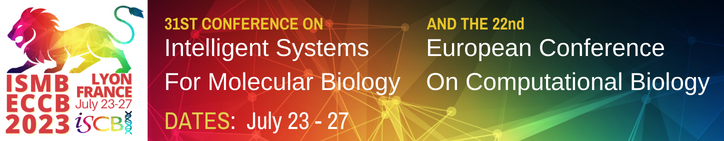

## **VT2:  Protein Sequence Analysis using Transformer-based Large Language Model**


31st Conference on Intelligent Systems for Molecular Biology (ISMB) /
22nd European Conference on Computational Biology (ECCB)

**Venue:** Hybrid (Virtual/Lyon,France)

**Date of the session:** July 17-18, 2023

**Instructor :** Bishnu Sarker, PhD

**Affiliation :** Meharry Medical College School of Applied Computational Sciences, Tennessee, USA

Please cite this tutorial as:

**Bishnu Sarker, Sayane Shome, Farzana Rahman, Nima Aghaeepour (2023, July). Tutorial VT2: Protein Sequence Analysis using Transformer-based Large Language Model. In 31st Conference on Intelligent Systems for Molecular Biology and 22nd European Conference on Computational Biology (ISMB/ECCB 2023), Lyon, France.**

## Part-1B :  Building a simple Residue-level Recurrent Neural Network(RNN) for Protein Sequence Classification.  

The story begins when someone has a protein sequence and want to know about the functional classification such as those defined using [Gene Ontology](http://geneontology.org/) or [Brenda](https://www.brenda-enzymes.org/), family classifications such as those defined by [InterPro](https://www.ebi.ac.uk/interpro/), or residue-wise binding sites, subcellular locations etc. This story can be formulated as a machine learning problem where the input is an amino acid sequence and the prediction is a functional class. Historically, this task has been done manually by looking into literatures and gathering evidences for appropriate functional classication. However, with the data collected for decades, machine learning techiques are now being utilized to computationally annotate sequences with their corresponding functional labels to keep pace with the enormous amount of protein sequences deposited in the public repositories such as [UniProtKB](https://www.uniprot.org/). From the data science perspective, this is a text classification problem as the sequences are texts. One significant difference is that instead of words as tokens, each amino acid residue serves as token in sequence classification.

Overall the objective of the this tutorial to present deep learning techniques for sequence classification. While the primary purpose is to use transformer-based language models, we  begin by implementing simple recurrent neural network (RNN) based models from scratch to understand the inner working of the models a bit.

In this part-1B of this tutorial series, we will build a Residue-level RNN for sequence classification.  This model will classify a sequence into various enzymatic functions. We will use a small dataset located in the *data folder.*

Ideally, the objectives in this part-1B are:
1. Loading, preprocessing and vectorizing the sequence data for working with Pytorch RNN models
2. Building a residue-level RNN model for sequence classification into enzymatic functions.

#**SECTION 1 : Loading, preprocessing and vectorizing the sequence data for working with Pytorch RNN models**

####Let's start by importing required packages.

In [ ]:
# Loading general data science packages
import pandas as pd
import numpy as np

# For visualization support,we will load matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

# package for random choice generation
import random
from random import sample

# for machine learning tasks,we are loading pytorch and scikit-learn
import sklearn as sk
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim




## **A. Loading data from the Google Drive**

Now let's load and read the data into appropriate data structure such as Pandas Data Frames. In essence, following code section,
1. Mount the drive for using in colab notebook
2. Load the dataset from the drive folder, and
3. Read it into as a Pandas dataframe.

#### 1. Mount the drive

In [ ]:
## Loading data
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#### 2. Set current working directory to ISMB_ECCB_2023

In [ ]:

%cd /content/drive/MyDrive/ISMB_ECCB_2023


/content/drive/MyDrive/ISMB_ECCB_2023


#### 3. Read the dataset into a Pandas dataframe

In [ ]:
data_path="data/Seq_class.csv"
df=pd.read_csv(data_path)

#### 4.  Dataset exploration and understanding the components
Now,let's look into the data matrix and its contents.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37951 entries, 0 to 37950
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   structureId     37951 non-null  object
 1   sequence        37951 non-null  object
 2   classification  37951 non-null  object
dtypes: object(3)
memory usage: 889.6+ KB


In [ ]:
## The next command will showcase the first 10 rows of the dataframe.

In [ ]:
df.head(10)


,structureId,sequence,classification
0,177L,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...,HYDROLASE
1,178L,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...,HYDROLASE
2,1A0I,VNIKTNPFKAVSFVESAIKKALDNAGYLIAEIKYDGVRGNICVDNT...,LIGASE
3,1A16,SEISRQEFQRRRQALVEQMQPGSAALIFAAPEVTRSADSEYPYRQN...,HYDROLASE/HYDROLASE INHIBITOR
4,1A17,RDEPPADGALKRAEELKTQANDYFKAKDYENAIKFYSQAIELNPSN...,HYDROLASE
5,1A23,AQYEDGKQYTTLEKPVAGAPQVLEFFSFFCPHCYQFEEVLHISDNV...,OXIDOREDUCTASE
6,1A24,AQYEDGKQYTTLEKPVAGAPQVLEFFSFFCPHCYQFEEVLHISDNV...,OXIDOREDUCTASE
7,1A26,ALTVSAGTKSKLAKPIQDLIKMIFDVESMKKAMVEFEIDLQKMPLG...,TRANSFERASE
8,1A2F,LVHVASVEKGRSYEDFQKVYNAIALKLREDDEYDNYIGYGPVLVRL...,OXIDOREDUCTASE
9,1A2G,LVHVASVEKGRSYEDFQKVYNAIALKLREDDEYDNYIGYGPVLVRL...,OXIDOREDUCTASE


There are 37951 rows/entries in the dataframe. Each entry contains structure ID from protein data bank (PDB), amino acid sequence of the protein, and 'classification' labels depicting the enzymatic functions they are responsible for.  

For our tutorial session,we only need the columns 'sequence' and 'classification' from the dataframe.

Let's create some new variable to store the columns 'sequences' and 'classification' as lists. As well,we will determine the number of unique classification labels are in the dataset.

In [ ]:
data_seqs=list(df.sequence)
data_labels=list(df.classification)
labels=list(set(data_labels))

In [ ]:
print('The number instances in the dataset:', len(data_seqs))
print('The number unique labels:', len(labels))

The number instances in the dataset: 37951
The number unique labels: 25


There are 25  unique labels in this dataset,which we are printing below as follows:

In [ ]:
print(labels)

['HYDROLASE/HYDROLASE INHIBITOR', 'UNKNOWN FUNCTION', 'TRANSFERASE', 'ELECTRON TRANSPORT', 'HYDROLASE', 'CELL ADHESION', 'VIRAL', 'LIGASE', 'TOXIN', 'CHAPERONE', 'RNA BINDING', 'SIGNALING', 'OXIDOREDUCTASE', 'MEMBRANE', 'METAL BINDING', 'TRANSPORT', 'TRANSFERASE/TRANSFERASE INHIBITOR', 'STRUCTURAL', 'DNA BINDING', 'TRANSCRIPTION', 'ISOMERASE', 'SUGAR BINDING', 'IMMUNE SYSTEM', 'PROTEIN BINDING', 'LYASE']


<a name='2'></a>
## **B. Tensor-ification**

Now that we have read the dataset, let's write some helper functions to obtain the sequences and classification labels as tensors. Tensors are n-dimensional arrays in PyTorch and they are fundamental data structures used for building deep learning models.

In this section, the objectives are:
*   Define the vocabulary. Typically it is the list of 20 amino acids (AA) represented with single letter code.
*   Define function to get index of an AA.
*   Define a function to get tensor of an AA.
*   Define a function to get a tensor of a sequence.


Define our "dictionary" of the "language" as a list of the amino acids available.

In [10]:
# Defining vocabulatory by defining a list which contains all the 20 Single Letter Amino Acid(AA) Codes
CODES = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L',
         'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

AA_CODES="".join(CODES)  # join as a string

n_AA = len(AA_CODES)  #there will be 20 letters

Get the index of an Amino Acid (AA).

In [11]:
def AAToIndex(AA):
  return AA_CODES.find(AA)

Create a tensor for each Amino Acid representing them as a one hot vector. Place a 1 in corresponding index of the 20 length tensor of zeros.

In [12]:
def AAToTensor(AA):
  tensor=torch.zeros(1, n_AA) # declare a tensor of zeros of size 1xn_AA = 1x20
  tensor[0][AAToIndex(AA)]=1 # put a 1 at the position of the letter
  return tensor # return the tensor.

For a sequence of length L, following function creates a tensor of size **Lx1x20 **to represent the sequence as a single tensor. Eventually, the model will be fed with sequence tensor.

In [13]:
def SequenceToTensor(AAsequence):
  tensor=torch.zeros(len(AAsequence), 1, n_AA)   # declare a tensor of zeros of size len(AAsequence)x1x n_AA
  for aaindex, aa in enumerate(AAsequence): # li is the position of the letter in the name.
    #tensor[li][0][letterToIndex(letter)]=1
    tensor[aaindex]=AAToTensor(aa)
  return tensor

Let's explore what the above functions do using a following example sequence.

In [14]:
example_seq=data_seqs[0]
example_seq

'MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWCEAAVNLAKSRWYNQTPNRAKRVITTFCTGTWDAYKNL'

In [18]:
AAToIndex('M') # M is located at index 10 in the dictionary

10

In [16]:
AA_tensor=AAToTensor('M')
print(AA_tensor.shape)
print(AA_tensor)

torch.Size([1, 20])
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]])


As you can see from the above output, the function *AAToTensor()* has created a tensor of size [1, 20] meaning 1 row of 20 numbers. And a 1 is placed at 10th position indicating the position of the amino acid 'M' in the AA_CODES.

In [19]:
seq_tensor=SequenceToTensor(example_seq)
print(seq_tensor.shape)
print(seq_tensor)

torch.Size([164, 1, 20])
tensor([[[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]]])


In the above output, a tensor of size [164, 1, 20] is created for the example sequence.The length of the sequence is 164,whereas 1 and 20 together represent the 1 row of 20 numbers for each residue in the sequence. Basically, 164 vectors of length 20 are stacked in the output tensor.

We can access the tensor for a single reside by individual index in the sequence.

In [20]:
seq_tensor[0]

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]])

#**2. Building a residue-level RNN model for sequence classification into enzymatic functions.**

## **A. Defining the RNN architecture**

Working with deep learning become more of an art than science.  With Python packages like PyTorch, it is now possible to define complex model architecture by placing different neural network layers.

Recurrent Neural Network is a special kind of neural network that unfolds in time to process the temporal dependeancy among the components in an input sequence. At each time step $t_1$, it takes an input $x_1$ and a hidden state from past time ste $h_0$ to produce the next hidden state $h_1$.The new hidden state $h_1$ is feed to the next time step $t_2$ and also, can be modeled as corresponding output for the time step $t_1$.
Ideally, a RNN is defined as,
$$h_t=f_w(h_{t-1}, x_t)$$.

A comprehensive description of RNN and its variants can be found [here](https://cs231n.github.io/rnn/).  

Following example shows the layer-wise computation of a character level RNN.

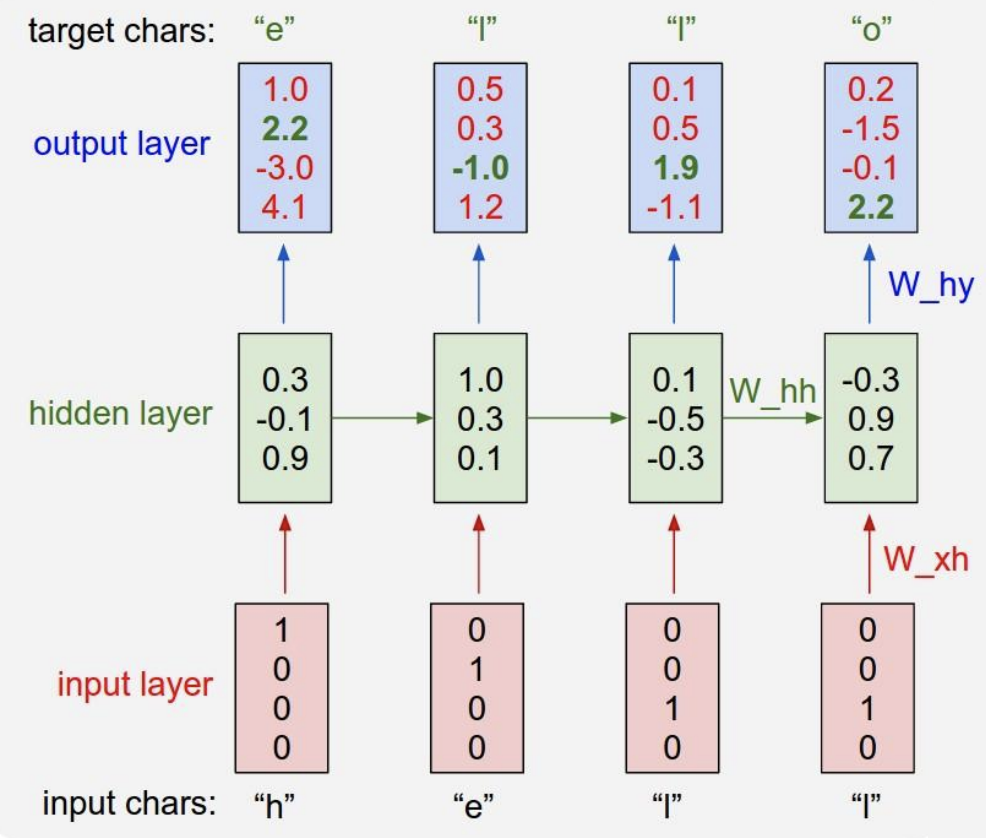
Image Source: (https://cs231n.github.io/rnn/)


In the following code section, we define a reside-level RNN for sequence classification. This implementation is similar to the character-level RNN for names classification as  implemented in [https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html](https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html)

The model combines the current input $x_t$ and previous hidden state $h_{t-1}$ as shown in the following figure. And to produce the final prediction, the hidden state from the last time step is passed through a linear neural layer and then through a softmax.

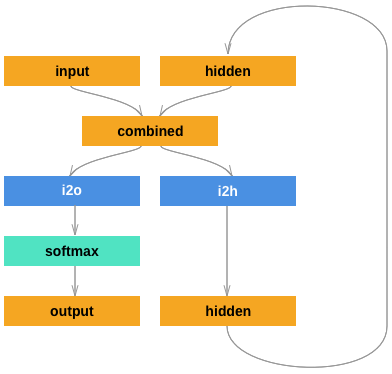

Image Source: https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html

The input (amino acid) is combined with a hidden state. The combined input is passed into an NN which gets the next hidden state for the model. For the last residue in the sequence, we get the output class.<br>
RNN recurrently accumulates info. Final output reflects the whole sequence.
Last hidden state is the output class.

In [22]:
## Defining RNN:
## input_size=20
## hidden_size=128
## output_size=25

class RNN101(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(RNN101, self).__init__()

    self.input_size=input_size
    self.hidden_size=hidden_size
    self.output_size=output_size

    self.input2hidden=nn.Linear(input_size+hidden_size, hidden_size)
    self.input2output=nn.Linear(input_size+hidden_size, output_size)

    self.softmax=nn.LogSoftmax(dim=1)

  def forward(self, input, hidden):
    concat_input=torch.cat((input, hidden), dim=1) # Concatenate input and hidden state

    new_hidden=self.input2hidden(concat_input) # Combined input is passed to linear layer, producing the next hidden state

    output=self.input2output(concat_input)
    output=self.softmax(output) # each element in the output is a probability
    return new_hidden, output

  # For the very first state, we do not have a hidden value from the previous state.
  # Hence, we need to initialise the hidden state.
  def initHidden(self):
    return torch.zeros(1,self.hidden_size)
    # This is just one way to initialise the hidden state.
    # There are some alternative methods that may improve the performance.


## **B. Model training**

Once the architecture of the model is defined, next step is to train the model on the training sequences.

For simplicity, instead of whole dataset, we will use a randomly sampled set of sequences. We will make sure we have equal number of sequence per labels. The function ***prepare_examples()*** prepares the training examples by randomly selecting the sequences and pairing their tensors with respective labels.

In this section, the objectives are:
1. Define a helper function to create a dictionary to group sequences by their labels.
2. Define a helper function to prepare a training dataset by randomly selecting a set of sequences per label.
3. Define a  function to prepare a single pair of random label and a random sequence from that label.
4. Set the hyper-parameters.
5. Initialize the model object.
6. Initialize the loss function
7. Finally, training the model on training sequences.

### 1. ***prepare_data_dict()***
Preparing a dictionary out of the sequence and labels data. Labels are the keys and under each label, there is a list of sequences.

In [23]:
def prepare_data_dict(seqs, labels):
  data_dict={}
  for lbl, seq in zip(labels, seqs):
    if lbl not in data_dict:
      data_dict[lbl]=[seq]
    else:
      data_dict[lbl].append(seq)
  return data_dict
data_dict=prepare_data_dict(data_seqs, data_labels)


### 2. **prepare_examples()**
Obtaining a random sample of sequences for training the model.

In [24]:
def prepare_examples(data_dict, unique_labels, sample_size=2):
  pairs=[]
  #lbls_=list(data_labels)
  for label in unique_labels:
    label_tensor=torch.tensor([unique_labels.index(label)], dtype=torch.long)
    seqs=sample(data_dict[label],sample_size)
    for seq in seqs:
      seq_tensor=SequenceToTensor(seq)
      pairs.append((seq_tensor, label_tensor))
  return pairs
x=prepare_examples(data_dict=data_dict, unique_labels=labels, sample_size=5)


In [25]:
len(x)

125

### 3. **prepare_one_pair()**
Obtain a random sequence paired with its corresponding labels and respective tensors.

In [26]:
def prepare_one_pair(data_dict, unique_labels):
  #lbls_=list(data_labels)
  label=random.choice(labels)
  sequence=random.choice(data_dict[label])

  label_tensor=torch.tensor([unique_labels.index(label)], dtype=torch.long)
  seq_tensor=SequenceToTensor(sequence)

  return label, label_tensor, sequence, seq_tensor

#### 4. Setting the hyper-parameters of the models

There are few hyper-parameters which are needed to be set ahead of training. These parameters include the dimension of the hidden layer, learning rate for the gradient descent, number of layers, drop-out rate etc.
While the model optimizes the internal weight parameters, these parameters need to be pre-set by the user. However, there are techniques like gridsearch that find the optimal set fo hyperparameters that bring the best outcome.
Here, we will manually manually set these hyper-parameters.
In the below code, we are setting the hidden dimensions to 128, learning rate to 0.005. For simplicity, we consider only a single layer of RNN with no dropout layer.

In [29]:
n_hidden=128 # size of the hidden vector
n_labels=len(labels) # number of labels
learning_rate=0.005 # needed for SGD - how much to move forward in each iteration

### 5. Model initialization

In this step, we created the model object initialized with input, hidden and output dimensions and gave it a name of our preference.You can also tweak the name according to your preference !

In [30]:
rnn=RNN101(n_AA, n_hidden, n_labels)

### 6. Initializing a loss function
A loss function computes the distance between predicted outcome and given true outcome. Thus, quantifies the loss. In a deep learning model, the loss is optimized, typically minimized using some optimization techiques such as famous gradient descent. There are many such loss functions available in Pytorch.
In this section, we will use Negative Log-Likelihood Loss defined in Pytorch *nn* module as *NLLLoss()*

In [31]:
loss_fn=nn.NLLLoss()

### 7. **predict()**

The following predict() function compute a output tensor from the input tensor computed per sequence.

In [32]:
##3 Predictions
def predict(sequence_tensor):
  hidden=rnn.initHidden() # initialize the hidden state to zero

  # Run the RNN for each amino acid
  for i in range(sequence_tensor.size()[0]):
    hidden,output=rnn(sequence_tensor[i],hidden) # The model provides two outputs: the final hidden state, and the output.
  return output # We are only interested in the output, which reflects the whole sequence.

### Model Training steps

In the following code, we combine everything to run a training session.
At each step,it computes the loss and perform back-propogation to optimize the loss by updating the parameters/weights.

We accumulate the loss in the c_loss variable, so we can see how the loss changes each epoch.
1. Initialise loss to 0
2. Predict output
3. Compute loss
4. Backward propagate the losses
5. Optimise parameters

We are just running for a few epochs here as an example, so the loss hasn't yet converged to a low value.

In [33]:
n_epochs=5

for i_epoch in range(n_epochs+1):
  c_loss=0
  ##### Process the training example.
  for seq_tensor, label_tensor in prepare_examples(data_dict=data_dict, unique_labels=labels, sample_size=1):
    ### For a single instance following steps are necessary
    rnn.zero_grad()
    output=predict(seq_tensor)
    loss=loss_fn(output,label_tensor) # for sequence, compute the loss compared to true label

    loss.backward() # back propagate the  errors.
    ## Optimize the parameter
    for p in rnn.parameters():
      p.data.add_(p.grad.data, alpha=-learning_rate)
    c_loss+=loss.item()
    # steps end here after you have
  print("Epoch:{},loss:{}".format(i_epoch, c_loss) )


Epoch:0,loss:80.83241438865662
Epoch:1,loss:80.50356483459473
Epoch:2,loss:81.19311141967773
Epoch:3,loss:80.79130244255066
Epoch:4,loss:80.55641961097717
Epoch:5,loss:80.65055680274963


## **C. Model testing and performance evaluation**

In the following section, the predictions are printed as formatted text showing the correct predictions and also highlghting the incorrect ones.

To start, we'll create some helper functions to facilitate the transformation of output vectors into categories. Additionally, we'll format the predicted categories and true categories by referencing the actual labels in the dataset. The "topk(k)" function will allow us to extract the top k highest values from an output vector. By obtaining the indices of these top-k values, we can retrieve the corresponding labels from the list of labels.

In this section, our objectives are as follows:

1.   Define a function that can transform an output tensor into a label.
2.   Generate predictions for randomly selected sequences and compare them with the actual labels.
3.   Create a confusion matrix to visually represent the misclassifications, indicating which labels are misclassified as what.

### 1. **labelsFromOutput()**

In [34]:
def labelsFromOutput(output):
    top_n, top_i = output.topk(1)

    label_i = top_i[0].item()
    #print(top_n, top_i, label_i, data_labels[label_i])
    return label_i

### 2. Predictions

In [36]:
with torch.no_grad(): # torch.no_grad() avoids updating the gradient any further when we are just testing
  for seq_tensor, label_tensor in prepare_examples(data_dict=data_dict, unique_labels=labels, sample_size=1):
    output=predict(seq_tensor)

    label_i=labelsFromOutput(output) # output is converted to index of output list

    predicted_label=labels[label_i] # get predicted label
    actual_label=data_labels[label_tensor[0]] # get actual label

    print(f"Predicted:{ predicted_label} - Actual:{actual_label}") # compare predicted with actual

Predicted:OXIDOREDUCTASE - Actual:HYDROLASE
Predicted:METAL BINDING - Actual:HYDROLASE
Predicted:VIRAL - Actual:LIGASE
Predicted:TRANSCRIPTION - Actual:HYDROLASE/HYDROLASE INHIBITOR
Predicted:VIRAL - Actual:HYDROLASE
Predicted:TRANSPORT - Actual:OXIDOREDUCTASE
Predicted:VIRAL - Actual:OXIDOREDUCTASE
Predicted:TRANSPORT - Actual:TRANSFERASE
Predicted:VIRAL - Actual:OXIDOREDUCTASE
Predicted:METAL BINDING - Actual:OXIDOREDUCTASE
Predicted:VIRAL - Actual:ELECTRON TRANSPORT
Predicted:OXIDOREDUCTASE - Actual:OXIDOREDUCTASE
Predicted:TRANSPORT - Actual:TRANSFERASE
Predicted:VIRAL - Actual:HYDROLASE
Predicted:OXIDOREDUCTASE - Actual:ELECTRON TRANSPORT
Predicted:METAL BINDING - Actual:ISOMERASE
Predicted:VIRAL - Actual:HYDROLASE
Predicted:VIRAL - Actual:HYDROLASE
Predicted:PROTEIN BINDING - Actual:ELECTRON TRANSPORT
Predicted:PROTEIN BINDING - Actual:ISOMERASE
Predicted:METAL BINDING - Actual:LYASE
Predicted:ISOMERASE - Actual:VIRAL
Predicted:ISOMERASE - Actual:CHAPERONE
Predicted:OXIDOREDUCTAS

It is clear that the predicted label and actual label do not match in most cases!

### 3. Confusion Matrix
A confusion matrix is a valuable tool that offers a comprehensive view of a model's performance by illustrating both correct and incorrect classifications. The set of classes is represented along the x-axis and y-axis in the same order, with each row and column annotated accordingly. Each cell within the matrix corresponds to a value, either the actual count or row-normalized count, indicating how many times the label in the corresponding row was classified as the label in the corresponding column. Cells along the diagonal represent accurate predictions, while cells outside the diagonal indicate misclassifications.The confusion matrix serves as the foundation for various evaluation metrics, including precision, recall, F1 score, and accuracy. By analyzing the matrix, these metrics can be derived, providing valuable insights into the model's performance.
A comprehensive description is available from this [wikipage](https://en.wikipedia.org/wiki/Confusion_matrix) as well as [here](https://txt.cohere.com/classification-eval-metrics/)
For a good classifier the diagonal should have higher concentration of numbers. Now,let's build a confusion matrix.  

In [37]:
# predict a for a test set
def compute_confusion_matrix(sample_size=2):
  confusion=torch.zeros(n_labels, n_labels)
  with torch.no_grad():
    for seq_tensor, label_tensor in prepare_examples(data_dict=data_dict, unique_labels=labels, sample_size=1):
      pred_label_i=labelsFromOutput(predict(seq_tensor))
      actual_label=data_labels[label_tensor[0]]
      act_label_i=labels.index(actual_label)
      confusion[act_label_i][pred_label_i]+=1

  for i in range(n_labels):
    confusion[i]=confusion[i]/confusion[i].sum()
  return confusion

def plot_confusion(confusion_mat, unique_labels):

  fig=plt.figure()
  ax=fig.add_subplot(111)
  cax=ax.matshow(confusion_mat.numpy())
  fig.colorbar(cax)

  ax.set_xticklabels(['']+unique_labels, rotation=90)
  ax.set_yticklabels(['']+unique_labels)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

  plt.show()

def visualize_confusion_matrix(sample_size=2):
  confusion_mat=compute_confusion_matrix(sample_size=sample_size)
  plot_confusion(confusion_mat=confusion_mat, unique_labels=labels)


<ipython-input-37-c7851ff3ab7a>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+unique_labels, rotation=90)
<ipython-input-37-c7851ff3ab7a>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+unique_labels)


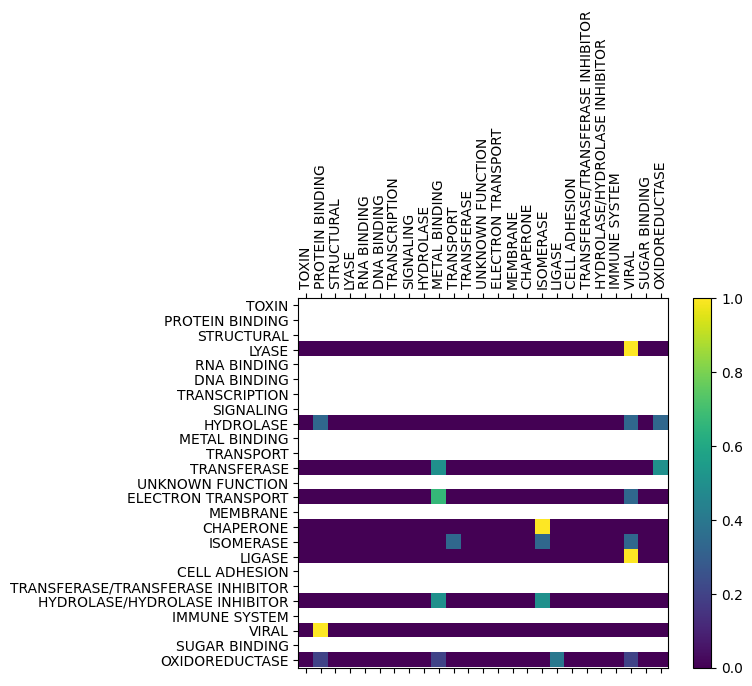

In [38]:
visualize_confusion_matrix(sample_size=2)

From the obtained confusion matrix, it is evident that the model is not optimally trained, leading to suboptimal prediction statistics. Nevertheless, even with the current results, we can observe a notable trend: a significant number of LYASE proteins were misclassified as DNA BINDING proteins.To aid in the visualization, the confusion matrix is accompanied by a color spectrum indicating the range of probability scores. The color spectrum ranges from yellow, representing high probabilities, to dark blue, representing the lowest probabilities.The confusion matrix and accompanying color spectrum provide valuable insights into the model's predictions and the misclassification patterns.

We would like to acknowledge help from the following sources:

1. https://androidkt.com/text-classification-in-pytorch/
2. https://github.com/HarshTrivedi/packing-unpacking-pytorch-minimal-tutorial
3. https://vl8r.eu/posts/2019/11/23/a-pytorch-rnn-with-variable-sequence-lengths/
4. https://gist.github.com/MikulasZelinka/9fce4ed47ae74fca454e88a39f8d911a
5. https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html
6. https://github.com/LeanManager/NLP-PyTorch/blob/master/Character-Level%20LSTM%20with%20PyTorch.ipynb